In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# # train test split
# df = pd.read_csv('data_final.csv')
# from sklearn.model_selection import train_test_split
# df_train, df_test = train_test_split(df, test_size=0.15, random_state=42)
# df_train, df_test = pd.DataFrame(df_train, columns=df.columns), pd.DataFrame(df_test, columns=df.columns)
# df_train.to_csv('train.csv', index=False)
# df_test.to_csv('test.csv', index=False)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
X = train.drop(['OS'], axis=1)
y = train['OS']

y.value_counts()

OS
0    1853
1      78
2      64
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=42)
Xt, yt = sampler.fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(Xt, yt, test_size=0.25, random_state=42)



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

model = RandomForestClassifier(random_state=42)
model.fit(Xt, yt)
y_pred = model.predict(X_val)
f1_score(y_val, y_pred, average='weighted')


1.0

In [35]:
X_test = test.drop(['OS'], axis=1)

y_test = test['OS']

y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')


0.9788733386889914

In [8]:
y_pred = np.zeros(len(y_test))
f1_score(y_test, y_pred, average='weighted')
# the worst we should get is this. let's keep it like this

0.9200077522256723

### grid search for hyper parameters


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer


params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier(random_state=42)
scoring = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, scoring=scoring)
grid_search.fit(Xt, yt)  

print(grid_search.best_params_)



{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [11]:
X_test = test.drop(['OS'], axis=1)

y_test = test['OS']
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.9764162284951421

Text(50.722222222222214, 0.5, 'True Labels')

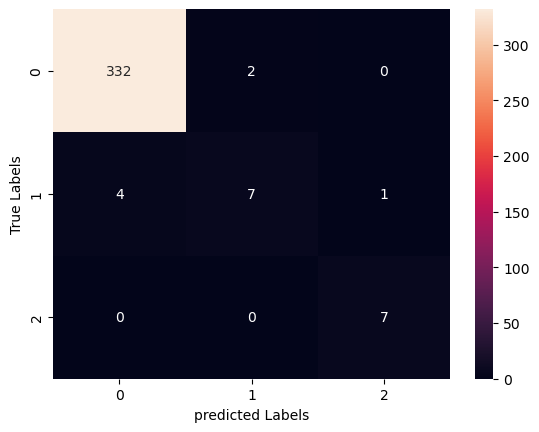

In [36]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred) 

sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")

### the capacity thing


In [13]:
def transform_battery_capacity_train(x):
    if x < train['battery_capacity'].quantile(0.33):
        return 0
    elif x < train['battery_capacity'].quantile(0.67):
        return 1
    return 2

In [14]:
X = train.drop(['OS'], axis=1)

    
X['battery_capacity'] = X['battery_capacity'].apply(transform_battery_capacity_train)

y = train['OS']


In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=42)
Xt, yt = sampler.fit_resample(X, y)
X_train, X_val, y_train, y_val = train_test_split(Xt, yt, test_size=0.25, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

model = RandomForestClassifier(random_state=42)
model.fit(Xt, yt)

y_pred = model.predict(X_val)
f1_score(y_val, y_pred, average='weighted')

1.0

In [17]:
def transform_battery_capacity_test(x):
    if x < test['battery_capacity'].quantile(0.33):
        return 0
    elif x < test['battery_capacity'].quantile(0.67):
        return 1
    return 2

In [18]:
X_test = test.drop(['OS'], axis=1)
X_test['battery_capacity'] = X_test['battery_capacity'].apply(transform_battery_capacity_test)

y_test = test['OS']

y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.9717467045514071

In [19]:
y_pred[y_test == 1], y_test[y_pred == 1]

(array([1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0], dtype=int64),
 84     1
 100    1
 101    0
 110    0
 114    1
 175    0
 182    1
 199    1
 215    1
 313    1
 334    0
 345    0
 Name: OS, dtype: int64)

Text(50.722222222222214, 0.5, 'True Labels')

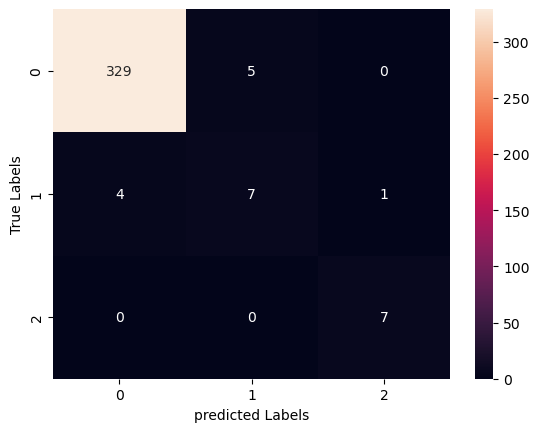

In [20]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred) 

sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")

### grid search again.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier(random_state=42)
scoring = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring=scoring)
grid_search.fit(Xt, yt)  

print(grid_search.best_params_)



{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [24]:
from sklearn.metrics import accuracy_score
X_test = test.drop(['OS'], axis=1)
X_test['battery_capacity'] = X_test['battery_capacity'].apply(transform_battery_capacity_test)

y_test = test['OS']
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='weighted'),  accuracy_score(y_test, y_pred)

(0.9740444225479329, 0.9745042492917847)

Text(50.722222222222214, 0.5, 'True Labels')

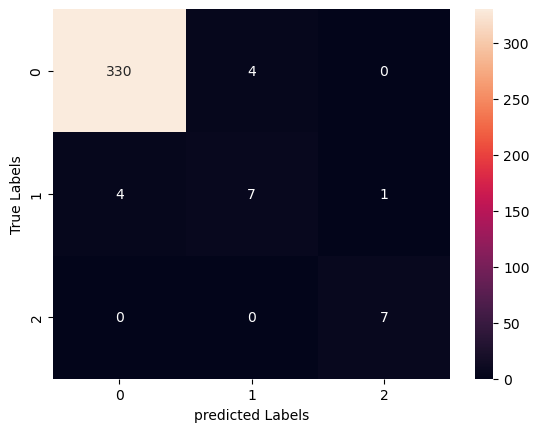

In [23]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred) 

sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")